Start with SGG.ipynb and SGG_Evaluation.ipynb in 'sgg' environment with python=3.7, CUDA 10.1

In [3]:
!pwd

/home/jaleed/Jaleed/SGG


In [2]:
!mkdir eval_inp_img
!mkdir eval_outp_sg
!mkdir temp_dir_inp
!mkdir temp_dir_out
!cp -r ../SGG_data/eval_inp_img/* eval_inp_img

In [5]:
! echo 'dsinuig123' | sudo -S apt-get update
! echo 'dsinuig123' | sudo -S apt-get install linux-headers-$(uname -r)
! echo 'dsinuig123' | sudo -S apt-get -y install cmake

Get:1 file:/var/cuda-repo-10-1-local-10.1.105-418.39  InRelease
Ign:1 file:/var/cuda-repo-10-1-local-10.1.105-418.39  InRelease
Get:2 file:/var/cuda-repo-10-2-local-10.2.89-440.33.01  InRelease
Ign:2 file:/var/cuda-repo-10-2-local-10.2.89-440.33.01  InRelease
Get:3 file:/var/cuda-repo-ubuntu1804-10-2-local  InRelease
Ign:3 file:/var/cuda-repo-ubuntu1804-10-2-local  InRelease
Get:4 file:/var/cuda-repo-10-1-local-10.1.105-418.39  Release [574 B]
Get:5 file:/var/cuda-repo-10-2-local-10.2.89-440.33.01  Release [574 B]
Get:6 file:/var/cuda-repo-ubuntu1804-10-2-local  Release [564 B]               
Get:4 file:/var/cuda-repo-10-1-local-10.1.105-418.39  Release [574 B]          
Get:5 file:/var/cuda-repo-10-2-local-10.2.89-440.33.01  Release [574 B]        
Get:6 file:/var/cuda-repo-ubuntu1804-10-2-local  Release [564 B]               
Hit:7 https://linux.teamviewer.com/deb stable InRelease                        
Hit:9 https://linux.teamviewer.com/deb preview InRelease                       


In [6]:
!gcc --version

gcc (Ubuntu 7.5.0-3ubuntu1~18.04) 7.5.0
Copyright (C) 2017 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.



In [7]:
# this command must work otherwise check the symLink /usr/local/cuda
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2019 NVIDIA Corporation
Built on Fri_Feb__8_19:08:17_PST_2019
Cuda compilation tools, release 10.1, V10.1.105


In [8]:
!conda install -y ipython
!conda install -y scipy
!conda install -y h5py
!python -m pip install ninja yacs cython matplotlib tqdm opencv-python overrides
!conda install -y pytorch==1.4.0 torchvision==0.5.0 cudatoolkit=10.1 -c pytorch
import torch
torch.cuda.is_available()

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.12.0
  latest version: 4.13.0

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.12.0
  latest version: 4.13.0

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/jaleed/anaconda3/envs/sgg

  added / updated specs:
    - scipy


The following NEW packages will be INSTALLED:

  blas               pkgs/main/linux-64::blas-1.0-mkl
  intel-openmp       pkgs/main/linux-64::intel-openmp-2021.4.0-h06a4308_3561
  libgfortran-ng     pkgs/main/linux-64::libgfortran-ng-7.5.0-ha8ba4b0_17
  libgfortran4       pkgs/main/linux-64::libgfortran4-7.5.0-ha8ba4b0_17
  mkl                pkgs/main/linux-64::mkl-2021.4.0-h06a4308_640
  mkl-service        pkgs/ma

## Install PyCOCO tools (cocoapi)

In [10]:
!git clone https://github.com/cocodataset/cocoapi.git
%cd cocoapi/PythonAPI
!python setup.py build_ext install
%cd ../..

Cloning into 'cocoapi'...
remote: Enumerating objects: 975, done.
remote: Total 975 (delta 0), reused 0 (delta 0), pack-reused 975
Receiving objects: 100% (975/975), 11.72 MiB | 9.88 MiB/s, done.
Resolving deltas: 100% (576/576), done.
/home/jaleed/Jaleed/SGG/cocoapi/PythonAPI
running build_ext
cythoning pycocotools/_mask.pyx to pycocotools/_mask.c
/home/jaleed/anaconda3/envs/sgg/lib/python3.7/site-packages/Cython/Compiler/Main.py:369: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /home/jaleed/Jaleed/SGG/cocoapi/PythonAPI/pycocotools/_mask.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)
building 'pycocotools._mask' extension
creating build
creating build/common
creating build/temp.linux-x86_64-3.7
creating build/temp.linux-x86_64-3.7/pycocotools
gcc -pthread -B /home/jaleed/anaconda3/envs/sgg/compiler_compat -Wl,--sysroot=/ -Wsign-compare -DNDEBUG -g -fwrapv -O3 -Wall -Wstrict-prototypes -fPIC -I/home

## Install apex

In [22]:
!wget https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64/libcublas-dev_10.1.0.105-1_amd64.deb
!echo 'dsinuig123' | sudo -S dpkg -i libcublas-dev_10.1.0.105-1_amd64.deb
!git clone https://github.com/NVIDIA/apex.git
%cd apex
!git reset --hard 3fe10b5597ba14a748ebb271a6ab97c09c5701ac
!python setup.py install --cuda_ext --cpp_ext
%cd ..



torch.__version__  = 1.4.0


setup.py:67: UserWarning: Option --pyprof not specified. Not installing PyProf dependencies!
  warnings.warn("Option --pyprof not specified. Not installing PyProf dependencies!")

Compiling cuda extensions with
nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2019 NVIDIA Corporation
Built on Fri_Feb__8_19:08:17_PST_2019
Cuda compilation tools, release 10.1, V10.1.105
from /usr/local/cuda-10.1//bin

running install
/home/jaleed/anaconda3/envs/sgg/lib/python3.7/site-packages/setuptools/command/install.py:37: SetuptoolsDeprecationWarning: setup.py install is deprecated. Use build and pip and other standards-based tools.
  setuptools.SetuptoolsDeprecationWarning,
/home/jaleed/anaconda3/envs/sgg/lib/python3.7/site-packages/setuptools/command/easy_install.py:147: EasyInstallDeprecationWarning: easy_install command is deprecated. Use build and pip and other standards-based tools.
  EasyInstallDeprecationWarning,
running bdist_egg
running egg_info
writing

In [57]:
!pip uninstall -y apex
%cd apex
!rm -rf build
!python setup.py install --cuda_ext --cpp_ext 
%cd ..

Found existing installation: apex 0.1
Uninstalling apex-0.1:
  Successfully uninstalled apex-0.1


## **Install PyTorch Detection (Scene-Graph-Benchmark.pytorch)**

In [23]:
!git clone https://github.com/KaihuaTang/Scene-Graph-Benchmark.pytorch.git Scene
!pip install -r Scene/requirements.txt
%cd Scene
!python setup.py build develop

Cloning into 'Scene'...
remote: Enumerating objects: 803, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 803 (delta 0), reused 0 (delta 0), pack-reused 800
Receiving objects: 100% (803/803), 29.27 MiB | 5.85 MiB/s, done.
Resolving deltas: 100% (405/405), done.
  Using cached torchtext-0.4.0-py3-none-any.whl (53 kB)
  Using cached pandas-1.3.5-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (11.3 MB)
/home/jaleed/Jaleed/SGG/Scene
running build
running build_py
creating build
creating build/lib.linux-x86_64-3.7
creating build/lib.linux-x86_64-3.7/maskrcnn_benchmark
copying maskrcnn_benchmark/__init__.py -> build/lib.linux-x86_64-3.7/maskrcnn_benchmark
creating build/lib.linux-x86_64-3.7/maskrcnn_benchmark/structures
copying maskrcnn_benchmark/structures/image_list.py -> build/lib.linux-x86_64-3.7/maskrcnn_benchmark/structures
copying maskrcnn_benchmark/structures/keypoint.py -> build/lib.linux-x86_64-3.7/maskrcnn_b

## VGDataset

In [40]:
%cd datasets/vg

/home/jaleed/Jaleed/SGG/Scene/datasets/vg


In [26]:
!wget https://cs.stanford.edu/people/rak248/VG_100K_2/images2.zip

--2022-05-18 17:53:50--  https://cs.stanford.edu/people/rak248/VG_100K_2/images2.zip
Resolving cs.stanford.edu (cs.stanford.edu)... 171.64.64.64
Connecting to cs.stanford.edu (cs.stanford.edu)|171.64.64.64|:443... failed: Connection timed out.
Retrying.

--2022-05-18 17:56:00--  (try: 2)  https://cs.stanford.edu/people/rak248/VG_100K_2/images2.zip
Connecting to cs.stanford.edu (cs.stanford.edu)|171.64.64.64|:443... ^C


In [44]:
!unzip -q images2.zip

In [ ]:
!unzip -q images.zip

## Download SGG

In [25]:
!pip install gdown
!gdown "https://1drv.ms/u/s!AmRLLNf6bzcir8xf9oC3eNWlVMTRDw?e=63t7Ed" -O datasets/vg/VG-SGG-with-attri.h5

  Using cached gdown-4.5.1-py3-none-any.whl
  Using cached filelock-3.7.1-py3-none-any.whl (10 kB)
Downloading...
From: https://1drv.ms/u/s!AmRLLNf6bzcir8xf9oC3eNWlVMTRDw?e=63t7Ed
To: /home/jaleed/Jaleed/SGG/Scene/datasets/vg/VG-SGG-with-attri.h5
6.80kB [00:00, 10.1MB/s]


In [26]:
%cd ..

/home/jaleed/Jaleed/SGG


In [29]:
!mkdir -p checkpoint
!unzip ../SGG_data/pretrained_faster_rcnn.zip -d checkpoint/
!unzip ../SGG_data/upload_causal_motif_sgdet.zip -d checkpoint/upload_causal_motif_sgdet

Archive:  ../SGG_data/pretrained_faster_rcnn.zip
   creating: checkpoint/pretrained-models/pretrained_faster_rcnn/pretrained_faster_rcnn/
  inflating: checkpoint/pretrained-models/pretrained_faster_rcnn/pretrained_faster_rcnn/config.yml  
  inflating: checkpoint/pretrained-models/pretrained_faster_rcnn/pretrained_faster_rcnn/labels.json  
  inflating: checkpoint/pretrained-models/pretrained_faster_rcnn/pretrained_faster_rcnn/last_checkpoint  
  inflating: checkpoint/pretrained-models/pretrained_faster_rcnn/pretrained_faster_rcnn/log.txt  
  inflating: checkpoint/pretrained-models/pretrained_faster_rcnn/pretrained_faster_rcnn/model_final.pth  
  inflating: checkpoint/pretrained-models/pretrained_faster_rcnn/pretrained_faster_rcnn/VG_stanford_filtered_wth_attribute_train_statistics.cache  
Archive:  ../SGG_data/upload_causal_motif_sgdet.zip
  inflating: checkpoint/pretrained-models/upload_causal_motif_sgdet/config.yml  
  inflating: checkpoint/pretrained-models/upload_causal_motif_sgdet/

## Utils

In [31]:
%cd Scene

/home/jaleed/Jaleed/SGG/Scene


In [32]:
%%writefile maskrcnn_benchmark/utils/imports.py
# Copyright (c) Facebook, Inc. and its affiliates. All Rights Reserved.
import torch
## https://stackoverflow.com/questions/67322049/attributeerror-module-torch-six-has-no-attribute-py3
if torch._six.PY37:
    import importlib
    import importlib.util
    import sys


    # from https://stackoverflow.com/questions/67631/how-to-import-a-module-given-the-full-path?utm_medium=organic&utm_source=google_rich_qa&utm_campaign=google_rich_qa
    def import_file(module_name, file_path, make_importable=False):
        spec = importlib.util.spec_from_file_location(module_name, file_path)
        module = importlib.util.module_from_spec(spec)
        spec.loader.exec_module(module)
        if make_importable:
            sys.modules[module_name] = module
        return module
else:
    import imp

    def import_file(module_name, file_path, make_importable=None):
        module = imp.load_source(module_name, file_path)
        return module

Overwriting maskrcnn_benchmark/utils/imports.py


In [5]:
import os
import sys
import torch
import h5py
import json
from PIL import Image
import numpy as np
from collections import defaultdict
from tqdm import tqdm
import random

from maskrcnn_benchmark.structures.bounding_box import BoxList
from maskrcnn_benchmark.structures.boxlist_ops import boxlist_iou

BOX_SCALE = 1024  # Scale at which we have the boxes

class VGDataset(torch.utils.data.Dataset):

    def __init__(self, split, img_dir, roidb_file, dict_file, image_file, transforms=None,
                filter_empty_rels=True, num_im=-1, num_val_im=5000,
                filter_duplicate_rels=True, filter_non_overlap=True, flip_aug=False, custom_eval=False, 
                 custom_path=''):
        """
        Torch dataset for VisualGenome
        Parameters:
            split: Must be train, test, or val
            img_dir: folder containing all vg images
            roidb_file:  HDF5 containing the GT boxes, classes, and relationships
            dict_file: JSON Contains mapping of classes/relationships to words
            image_file: HDF5 containing image filenames
            filter_empty_rels: True if we filter out images without relationships between
                             boxes. One might want to set this to false if training a detector.
            filter_duplicate_rels: Whenever we see a duplicate relationship we'll sample instead
            num_im: Number of images in the entire dataset. -1 for all images.
            num_val_im: Number of images in the validation set (must be less than num_im
               unless num_im is -1.)
        """
        # for debug
        # num_im = 10000
        # num_val_im = 4

        assert split in {'train', 'val', 'test'}
        self.flip_aug = flip_aug
        self.split = split
        self.img_dir = img_dir
        self.dict_file = dict_file
        self.roidb_file = roidb_file
        self.image_file = image_file
        self.filter_non_overlap = filter_non_overlap and self.split == 'train'
        self.filter_duplicate_rels = filter_duplicate_rels and self.split == 'train'
        self.transforms = transforms

        self.ind_to_classes, self.ind_to_predicates, self.ind_to_attributes = load_info(dict_file) # contiguous 151, 51 containing __background__
        self.categories = {i : self.ind_to_classes[i] for i in range(len(self.ind_to_classes))}

        self.custom_eval = custom_eval
        if self.custom_eval:
            self.get_custom_imgs(custom_path)
        else:
            self.split_mask, self.gt_boxes, self.gt_classes, self.gt_attributes, self.relationships = load_graphs(
                self.roidb_file, self.split, num_im, num_val_im=num_val_im,
                filter_empty_rels=filter_empty_rels,
                filter_non_overlap=self.filter_non_overlap,
            )

            self.filenames, self.img_info = load_image_filenames(img_dir, image_file) # length equals to split_mask
            self.filenames = [self.filenames[i] for i in np.where(self.split_mask)[0]]
            self.img_info = [self.img_info[i] for i in np.where(self.split_mask)[0]]


    def __getitem__(self, index):
        #if self.split == 'train':
        #    while(random.random() > self.img_info[index]['anti_prop']):
        #        index = int(random.random() * len(self.filenames))
        if self.custom_eval:
            img = Image.open(self.custom_files[index]).convert("RGB")
            target = torch.LongTensor([-1])
            if self.transforms is not None:
                img, target = self.transforms(img, target)
            return img, target, index
        
        img = Image.open(self.filenames[index]).convert("RGB")
        if img.size[0] != self.img_info[index]['width'] or img.size[1] != self.img_info[index]['height']:
            print('='*20, ' ERROR index ', str(index), ' ', str(img.size), ' ', str(self.img_info[index]['width']), ' ', str(self.img_info[index]['height']), ' ', '='*20)

        flip_img = (random.random() > 0.5) and self.flip_aug and (self.split == 'train')
        
        target = self.get_groundtruth(index, flip_img)

        if flip_img:
            img = img.transpose(method=Image.FLIP_LEFT_RIGHT)

        if self.transforms is not None:
            img, target = self.transforms(img, target)

        return img, target, index


    def get_statistics(self):
        fg_matrix, bg_matrix = get_VG_statistics(img_dir=self.img_dir, roidb_file=self.roidb_file, dict_file=self.dict_file,
                                                image_file=self.image_file, must_overlap=True)
        eps = 1e-3
        bg_matrix += 1
        fg_matrix[:, :, 0] = bg_matrix
        pred_dist = np.log(fg_matrix / fg_matrix.sum(2)[:, :, None] + eps)

        result = {
            'fg_matrix': torch.from_numpy(fg_matrix),
            'pred_dist': torch.from_numpy(pred_dist).float(),
            'obj_classes': self.ind_to_classes,
            'rel_classes': self.ind_to_predicates,
            'att_classes': self.ind_to_attributes,
        }
        return result

    def get_custom_imgs(self, path):
        self.custom_files = []
        self.img_info = []
        if os.path.isdir(path):
            for file_name in tqdm(os.listdir(path)):
                self.custom_files.append(os.path.join(path, file_name))
                img = Image.open(os.path.join(path, file_name)).convert("RGB")
                self.img_info.append({'width':int(img.width), 'height':int(img.height)})
        # Expecting a list of paths in a json file
        if os.path.isfile(path):
            file_list = json.load(open(path))
            for file in tqdm(file_list):
                img = Image.open(file).convert("RGB")
                self.img_info.append({'width': int(img.width), 'height': int(img.height)})

    def get_img_info(self, index):
        # WARNING: original image_file.json has several pictures with false image size
        # use correct function to check the validity before training
        # it will take a while, you only need to do it once

        # correct_img_info(self.img_dir, self.image_file)
        return self.img_info[index]

    def get_groundtruth(self, index, evaluation=False, flip_img=False):
        img_info = self.get_img_info(index)
        w, h = img_info['width'], img_info['height']
        # important: recover original box from BOX_SCALE
        box = self.gt_boxes[index] / BOX_SCALE * max(w, h)
        box = torch.from_numpy(box).reshape(-1, 4)  # guard against no boxes
        if flip_img:
            new_xmin = w - box[:,2]
            new_xmax = w - box[:,0]
            box[:,0] = new_xmin
            box[:,2] = new_xmax
        target = BoxList(box, (w, h), 'xyxy') # xyxy

        target.add_field("labels", torch.from_numpy(self.gt_classes[index]))
        target.add_field("attributes", torch.from_numpy(self.gt_attributes[index]))

        relation = self.relationships[index].copy() # (num_rel, 3)
        if self.filter_duplicate_rels:
            # Filter out dupes!
            assert self.split == 'train'
            old_size = relation.shape[0]
            all_rel_sets = defaultdict(list)
            for (o0, o1, r) in relation:
                all_rel_sets[(o0, o1)].append(r)
            relation = [(k[0], k[1], np.random.choice(v)) for k,v in all_rel_sets.items()]
            relation = np.array(relation, dtype=np.int32)
        
        # add relation to target
        num_box = len(target)
        relation_map = torch.zeros((num_box, num_box), dtype=torch.int64)
        for i in range(relation.shape[0]):
            if relation_map[int(relation[i,0]), int(relation[i,1])] > 0:
                if (random.random() > 0.5):
                    relation_map[int(relation[i,0]), int(relation[i,1])] = int(relation[i,2])
            else:
                relation_map[int(relation[i,0]), int(relation[i,1])] = int(relation[i,2])
        target.add_field("relation", relation_map, is_triplet=True)

        if evaluation:
            target = target.clip_to_image(remove_empty=False)
            target.add_field("relation_tuple", torch.LongTensor(relation)) # for evaluation
            return target
        else:
            target = target.clip_to_image(remove_empty=True)
            return target

    def __len__(self):
        if self.custom_eval:
            return len(self.custom_files)
        return len(self.filenames)


def get_VG_statistics(img_dir, roidb_file, dict_file, image_file, must_overlap=True):
    train_data = VGDataset(split='train', img_dir=img_dir, roidb_file=roidb_file, 
                        dict_file=dict_file, image_file=image_file, num_val_im=5000, 
                        filter_duplicate_rels=False)
    num_obj_classes = len(train_data.ind_to_classes)
    num_rel_classes = len(train_data.ind_to_predicates)
    fg_matrix = np.zeros((num_obj_classes, num_obj_classes, num_rel_classes), dtype=np.int64)
    bg_matrix = np.zeros((num_obj_classes, num_obj_classes), dtype=np.int64)

    for ex_ind in tqdm(range(len(train_data))):
        gt_classes = train_data.gt_classes[ex_ind].copy()
        gt_relations = train_data.relationships[ex_ind].copy()
        gt_boxes = train_data.gt_boxes[ex_ind].copy()

        # For the foreground, we'll just look at everything
        o1o2 = gt_classes[gt_relations[:, :2]]
        for (o1, o2), gtr in zip(o1o2, gt_relations[:,2]):
            fg_matrix[o1, o2, gtr] += 1
        # For the background, get all of the things that overlap.
        o1o2_total = gt_classes[np.array(
            box_filter(gt_boxes, must_overlap=must_overlap), dtype=int)]
        for (o1, o2) in o1o2_total:
            bg_matrix[o1, o2] += 1

    return fg_matrix, bg_matrix
    

def box_filter(boxes, must_overlap=False):
    """ Only include boxes that overlap as possible relations. 
    If no overlapping boxes, use all of them."""
    n_cands = boxes.shape[0]

    overlaps = bbox_overlaps(boxes.astype(np.float), boxes.astype(np.float), to_move=0) > 0
    np.fill_diagonal(overlaps, 0)

    all_possib = np.ones_like(overlaps, dtype=np.bool)
    np.fill_diagonal(all_possib, 0)

    if must_overlap:
        possible_boxes = np.column_stack(np.where(overlaps))

        if possible_boxes.size == 0:
            possible_boxes = np.column_stack(np.where(all_possib))
    else:
        possible_boxes = np.column_stack(np.where(all_possib))
    return possible_boxes

def bbox_overlaps(boxes1, boxes2, to_move=1):
    """
    boxes1 : numpy, [num_obj, 4] (x1,y1,x2,y2)
    boxes2 : numpy, [num_obj, 4] (x1,y1,x2,y2)
    """
    #print('boxes1: ', boxes1.shape)
    #print('boxes2: ', boxes2.shape)
    num_box1 = boxes1.shape[0]
    num_box2 = boxes2.shape[0]
    lt = np.maximum(boxes1.reshape([num_box1, 1, -1])[:,:,:2], boxes2.reshape([1, num_box2, -1])[:,:,:2]) # [N,M,2]
    rb = np.minimum(boxes1.reshape([num_box1, 1, -1])[:,:,2:], boxes2.reshape([1, num_box2, -1])[:,:,2:]) # [N,M,2]

    wh = (rb - lt + to_move).clip(min=0)  # [N,M,2]
    inter = wh[:, :, 0] * wh[:, :, 1]  # [N,M]

    return inter

def correct_img_info(img_dir, image_file):
    with open(image_file, 'r') as f:
        data = json.load(f)
    for i in range(len(data)):
        img = data[i]
        basename = '{}.jpg'.format(img['image_id'])
        filename = os.path.join(img_dir, basename)
        img_data = Image.open(filename).convert("RGB")
        if img['width'] != img_data.size[0] or img['height'] != img_data.size[1]:
            print('--------- False id: ', i, '---------')
            print(img_data.size)
            print(img)
            data[i]['width'] = img_data.size[0]
            data[i]['height'] = img_data.size[1]
    with open(image_file, 'w') as outfile:  
        json.dump(data, outfile)

def load_info(dict_file, add_bg=True):
    """
    Loads the file containing the visual genome label meanings
    """
    info = json.load(open(dict_file, 'r'))
    if add_bg:
        info['label_to_idx']['__background__'] = 0
        info['predicate_to_idx']['__background__'] = 0
        info['attribute_to_idx']['__background__'] = 0

    class_to_ind = info['label_to_idx']
    predicate_to_ind = info['predicate_to_idx']
    attribute_to_ind = info['attribute_to_idx']
    ind_to_classes = sorted(class_to_ind, key=lambda k: class_to_ind[k])
    ind_to_predicates = sorted(predicate_to_ind, key=lambda k: predicate_to_ind[k])
    ind_to_attributes = sorted(attribute_to_ind, key=lambda k: attribute_to_ind[k])

    return ind_to_classes, ind_to_predicates, ind_to_attributes


def load_image_filenames(img_dir, image_file):
    """
    Loads the image filenames from visual genome from the JSON file that contains them.
    This matches the preprocessing in scene-graph-TF-release/data_tools/vg_to_imdb.py.
    Parameters:
        image_file: JSON file. Elements contain the param "image_id".
        img_dir: directory where the VisualGenome images are located
    Return: 
        List of filenames corresponding to the good images
    """
    with open(image_file, 'r') as f:
        im_data = json.load(f)

    corrupted_ims = ['1592.jpg', '1722.jpg', '4616.jpg', '4617.jpg']
    fns = []
    img_info = []
    for i, img in enumerate(im_data):
        basename = '{}.jpg'.format(img['image_id'])
        if basename in corrupted_ims:
            continue

        filename = os.path.join(img_dir, basename)
        if os.path.exists(filename):
            fns.append(filename)
            img_info.append(img)
    assert len(fns) == 108073
    assert len(img_info) == 108073
    return fns, img_info


def load_graphs(roidb_file, split, num_im, num_val_im, filter_empty_rels, filter_non_overlap):
    """
    Load the file containing the GT boxes and relations, as well as the dataset split
    Parameters:
        roidb_file: HDF5
        split: (train, val, or test)
        num_im: Number of images we want
        num_val_im: Number of validation images
        filter_empty_rels: (will be filtered otherwise.)
        filter_non_overlap: If training, filter images that dont overlap.
    Return: 
        image_index: numpy array corresponding to the index of images we're using
        boxes: List where each element is a [num_gt, 4] array of ground 
                    truth boxes (x1, y1, x2, y2)
        gt_classes: List where each element is a [num_gt] array of classes
        relationships: List where each element is a [num_r, 3] array of 
                    (box_ind_1, box_ind_2, predicate) relationships
    """
    roi_h5 = h5py.File(roidb_file, 'r')
    data_split = roi_h5['split'][:]
    split_flag = 2 if split == 'test' else 0
    split_mask = data_split == split_flag

    # Filter out images without bounding boxes
    split_mask &= roi_h5['img_to_first_box'][:] >= 0
    if filter_empty_rels:
        split_mask &= roi_h5['img_to_first_rel'][:] >= 0

    image_index = np.where(split_mask)[0]
    if num_im > -1:
        image_index = image_index[:num_im]
    if num_val_im > 0:
        if split == 'val':
            image_index = image_index[:num_val_im]
        elif split == 'train':
            image_index = image_index[num_val_im:]


    split_mask = np.zeros_like(data_split).astype(bool)
    split_mask[image_index] = True

    # Get box information
    all_labels = roi_h5['labels'][:, 0]
    all_attributes = roi_h5['attributes'][:, :]
    all_boxes = roi_h5['boxes_{}'.format(BOX_SCALE)][:]  # cx,cy,w,h
    assert np.all(all_boxes[:, :2] >= 0)  # sanity check
    assert np.all(all_boxes[:, 2:] > 0)  # no empty box

    # convert from xc, yc, w, h to x1, y1, x2, y2
    all_boxes[:, :2] = all_boxes[:, :2] - all_boxes[:, 2:] / 2
    all_boxes[:, 2:] = all_boxes[:, :2] + all_boxes[:, 2:]

    im_to_first_box = roi_h5['img_to_first_box'][split_mask]
    im_to_last_box = roi_h5['img_to_last_box'][split_mask]
    im_to_first_rel = roi_h5['img_to_first_rel'][split_mask]
    im_to_last_rel = roi_h5['img_to_last_rel'][split_mask]

    # load relation labels
    _relations = roi_h5['relationships'][:]
    _relation_predicates = roi_h5['predicates'][:, 0]
    assert (im_to_first_rel.shape[0] == im_to_last_rel.shape[0])
    assert (_relations.shape[0] == _relation_predicates.shape[0])  # sanity check

    # Get everything by image.
    boxes = []
    gt_classes = []
    gt_attributes = []
    relationships = []
    for i in range(len(image_index)):
        i_obj_start = im_to_first_box[i]
        i_obj_end = im_to_last_box[i]
        i_rel_start = im_to_first_rel[i]
        i_rel_end = im_to_last_rel[i]

        boxes_i = all_boxes[i_obj_start : i_obj_end + 1, :]
        gt_classes_i = all_labels[i_obj_start : i_obj_end + 1]
        gt_attributes_i = all_attributes[i_obj_start : i_obj_end + 1, :]

        if i_rel_start >= 0:
            predicates = _relation_predicates[i_rel_start : i_rel_end + 1]
            obj_idx = _relations[i_rel_start : i_rel_end + 1] - i_obj_start # range is [0, num_box)
            assert np.all(obj_idx >= 0)
            assert np.all(obj_idx < boxes_i.shape[0])
            rels = np.column_stack((obj_idx, predicates)) # (num_rel, 3), representing sub, obj, and pred
        else:
            assert not filter_empty_rels
            rels = np.zeros((0, 3), dtype=np.int32)

        if filter_non_overlap:
            assert split == 'train'
            # construct BoxList object to apply boxlist_iou method
            # give a useless (height=0, width=0)
            boxes_i_obj = BoxList(boxes_i, (1000, 1000), 'xyxy')
            inters = boxlist_iou(boxes_i_obj, boxes_i_obj)
            rel_overs = inters[rels[:, 0], rels[:, 1]]
            inc = np.where(rel_overs > 0.0)[0]

            if inc.size > 0:
                rels = rels[inc]
            else:
                split_mask[image_index[i]] = 0
                continue

        boxes.append(boxes_i)
        gt_classes.append(gt_classes_i)
        gt_attributes.append(gt_attributes_i)
        relationships.append(rels)

    return split_mask, boxes, gt_classes, gt_attributes, relationships

## Change paths_catalog.py

In [9]:
%%writefile maskrcnn_benchmark/config/paths_catalog.py

# Copyright (c) Facebook, Inc. and its affiliates. All Rights Reserved.
"""Centralized catalog of paths."""

import os
import copy


class DatasetCatalog(object):
    #DATA_DIR = "/home/users/alatif/data/ImageCorpora/"
    #DATA_DIR = "/content/cocoapi/PythonAPI/apex/Scene/datasets/"
    DATA_DIR = "/home/jaleed/Jaleed/SGG/Scene/datasets/"
    DATASETS = {
        "coco_2017_train": {
            "img_dir": "coco/train2017",
            "ann_file": "coco/annotations/instances_train2017.json"
        },
        "coco_2017_val": {
            "img_dir": "coco/val2017",
            "ann_file": "coco/annotations/instances_val2017.json"
        },
        "coco_2014_train": {
            "img_dir": "coco/train2014",
            "ann_file": "coco/annotations/instances_train2014.json"
        },
        "coco_2014_val": {
            "img_dir": "coco/val2014",
            "ann_file": "coco/annotations/instances_val2014.json"
        },
        "coco_2014_minival": {
            "img_dir": "coco/val2014",
            "ann_file": "coco/annotations/instances_minival2014.json"
        },
        "coco_2014_valminusminival": {
            "img_dir": "coco/val2014",
            "ann_file": "coco/annotations/instances_valminusminival2014.json"
        },
        "keypoints_coco_2014_train": {
            "img_dir": "coco/train2014",
            "ann_file": "coco/annotations/person_keypoints_train2014.json",
        },
        "keypoints_coco_2014_val": {
            "img_dir": "coco/val2014",
            "ann_file": "coco/annotations/person_keypoints_val2014.json"
        },
        "keypoints_coco_2014_minival": {
            "img_dir": "coco/val2014",
            "ann_file": "coco/annotations/person_keypoints_minival2014.json",
        },
        "keypoints_coco_2014_valminusminival": {
            "img_dir": "coco/val2014",
            "ann_file": "coco/annotations/person_keypoints_valminusminival2014.json",
        },
        "voc_2007_train": {
            "data_dir": "voc/VOC2007",
            "split": "train"
        },
        "voc_2007_train_cocostyle": {
            "img_dir": "voc/VOC2007/JPEGImages",
            "ann_file": "voc/VOC2007/Annotations/pascal_train2007.json"
        },
        "voc_2007_val": {
            "data_dir": "voc/VOC2007",
            "split": "val"
        },
        "voc_2007_val_cocostyle": {
            "img_dir": "voc/VOC2007/JPEGImages",
            "ann_file": "voc/VOC2007/Annotations/pascal_val2007.json"
        },
        "voc_2007_test": {
            "data_dir": "voc/VOC2007",
            "split": "test"
        },
        "voc_2007_test_cocostyle": {
            "img_dir": "voc/VOC2007/JPEGImages",
            "ann_file": "voc/VOC2007/Annotations/pascal_test2007.json"
        },
        "voc_2012_train": {
            "data_dir": "voc/VOC2012",
            "split": "train"
        },
        "voc_2012_train_cocostyle": {
            "img_dir": "voc/VOC2012/JPEGImages",
            "ann_file": "voc/VOC2012/Annotations/pascal_train2012.json"
        },
        "voc_2012_val": {
            "data_dir": "voc/VOC2012",
            "split": "val"
        },
        "voc_2012_val_cocostyle": {
            "img_dir": "voc/VOC2012/JPEGImages",
            "ann_file": "voc/VOC2012/Annotations/pascal_val2012.json"
        },
        "voc_2012_test": {
            "data_dir": "voc/VOC2012",
            "split": "test"
            # PASCAL VOC2012 doesn't made the test annotations available, so there's no json annotation
        },
        "cityscapes_fine_instanceonly_seg_train_cocostyle": {
            "img_dir": "cityscapes/images",
            "ann_file": "cityscapes/annotations/instancesonly_filtered_gtFine_train.json"
        },
        "cityscapes_fine_instanceonly_seg_val_cocostyle": {
            "img_dir": "cityscapes/images",
            "ann_file": "cityscapes/annotations/instancesonly_filtered_gtFine_val.json"
        },
        "cityscapes_fine_instanceonly_seg_test_cocostyle": {
            "img_dir": "cityscapes/images",
            "ann_file": "cityscapes/annotations/instancesonly_filtered_gtFine_test.json"
        },
        "VG_stanford_filtered": {
            "img_dir": "vg/VG_100K",
            "roidb_file": "vg/VG-SGG.h5",
            "dict_file": "vg/VG-SGG-dicts.json",
            "image_file": "vg/image_data.json",
        },
        "VG_stanford_filtered_with_attribute": {
            "img_dir": "vg/VG_100K",
            "roidb_file": "vg/VG-SGG-with-attri.h5",
            "dict_file": "vg/VG-SGG-dicts-with-attri.json",
            "image_file": "vg/image_data.json",
            "capgraphs_file": "vg/vg_capgraphs_anno.json",
        },
    }

    @staticmethod
    def get(name, cfg):
        if "coco" in name:
            data_dir = DatasetCatalog.DATA_DIR
            attrs = DatasetCatalog.DATASETS[name]
            args = dict(
                root=os.path.join(data_dir, attrs["img_dir"]),
                ann_file=os.path.join(data_dir, attrs["ann_file"]),
            )
            return dict(
                factory="COCODataset",
                args=args,
            )
        elif "voc" in name:
            data_dir = DatasetCatalog.DATA_DIR
            attrs = DatasetCatalog.DATASETS[name]
            args = dict(
                data_dir=os.path.join(data_dir, attrs["data_dir"]),
                split=attrs["split"],
            )
            return dict(
                factory="PascalVOCDataset",
                args=args,
            )
        elif ("VG" in name) or ('GQA' in name):
            # name should be something like VG_stanford_filtered_train
            p = name.rfind("_")
            name, split = name[:p], name[p+1:]
            assert name in DatasetCatalog.DATASETS and split in {'train', 'val', 'test'}
            data_dir = DatasetCatalog.DATA_DIR
            args = copy.deepcopy(DatasetCatalog.DATASETS[name])
            for k, v in args.items():
                args[k] = os.path.join(data_dir, v)
            args['split'] = split
            # IF MODEL.RELATION_ON is True, filter images with empty rels
            # else set filter to False, because we need all images for pretraining detector
            args['filter_non_overlap'] = (not cfg.MODEL.ROI_RELATION_HEAD.USE_GT_BOX) and cfg.MODEL.RELATION_ON and cfg.MODEL.ROI_RELATION_HEAD.REQUIRE_BOX_OVERLAP
            args['filter_empty_rels'] = cfg.MODEL.RELATION_ON
            args['flip_aug'] = cfg.MODEL.FLIP_AUG
            args['custom_eval'] = cfg.TEST.CUSTUM_EVAL
            args['custom_path'] = cfg.TEST.CUSTUM_PATH
            return dict(
                factory="VGDataset",
                args=args,
            )

        raise RuntimeError("Dataset not available: {}".format(name))


class ModelCatalog(object):
    S3_C2_DETECTRON_URL = "https://dl.fbaipublicfiles.com/detectron"
    C2_IMAGENET_MODELS = {
        "MSRA/R-50": "ImageNetPretrained/MSRA/R-50.pkl",
        "MSRA/R-50-GN": "ImageNetPretrained/47261647/R-50-GN.pkl",
        "MSRA/R-101": "ImageNetPretrained/MSRA/R-101.pkl",
        "MSRA/R-101-GN": "ImageNetPretrained/47592356/R-101-GN.pkl",
        "FAIR/20171220/X-101-32x8d": "ImageNetPretrained/20171220/X-101-32x8d.pkl",
    }

    C2_DETECTRON_SUFFIX = "output/train/{}coco_2014_train%3A{}coco_2014_valminusminival/generalized_rcnn/model_final.pkl"
    C2_DETECTRON_MODELS = {
        "35857197/e2e_faster_rcnn_R-50-C4_1x": "01_33_49.iAX0mXvW",
        "35857345/e2e_faster_rcnn_R-50-FPN_1x": "01_36_30.cUF7QR7I",
        "35857890/e2e_faster_rcnn_R-101-FPN_1x": "01_38_50.sNxI7sX7",
        "36761737/e2e_faster_rcnn_X-101-32x8d-FPN_1x": "06_31_39.5MIHi1fZ",
        "35858791/e2e_mask_rcnn_R-50-C4_1x": "01_45_57.ZgkA7hPB",
        "35858933/e2e_mask_rcnn_R-50-FPN_1x": "01_48_14.DzEQe4wC",
        "35861795/e2e_mask_rcnn_R-101-FPN_1x": "02_31_37.KqyEK4tT",
        "36761843/e2e_mask_rcnn_X-101-32x8d-FPN_1x": "06_35_59.RZotkLKI",
        "37129812/e2e_mask_rcnn_X-152-32x8d-FPN-IN5k_1.44x": "09_35_36.8pzTQKYK",
        # keypoints
        "37697547/e2e_keypoint_rcnn_R-50-FPN_1x": "08_42_54.kdzV35ao"
    }

    @staticmethod
    def get(name):
        if name.startswith("Caffe2Detectron/COCO"):
            return ModelCatalog.get_c2_detectron_12_2017_baselines(name)
        if name.startswith("ImageNetPretrained"):
            return ModelCatalog.get_c2_imagenet_pretrained(name)
        raise RuntimeError("model not present in the catalog {}".format(name))

    @staticmethod
    def get_c2_imagenet_pretrained(name):
        prefix = ModelCatalog.S3_C2_DETECTRON_URL
        name = name[len("ImageNetPretrained/"):]
        name = ModelCatalog.C2_IMAGENET_MODELS[name]
        url = "/".join([prefix, name])
        return url

    @staticmethod
    def get_c2_detectron_12_2017_baselines(name):
        # Detectron C2 models are stored following the structure
        # prefix/<model_id>/2012_2017_baselines/<model_name>.yaml.<signature>/suffix
        # we use as identifiers in the catalog Caffe2Detectron/COCO/<model_id>/<model_name>
        prefix = ModelCatalog.S3_C2_DETECTRON_URL
        dataset_tag = "keypoints_" if "keypoint" in name else ""
        suffix = ModelCatalog.C2_DETECTRON_SUFFIX.format(dataset_tag, dataset_tag)
        # remove identification prefix
        name = name[len("Caffe2Detectron/COCO/"):]
        # split in <model_id> and <model_name>
        model_id, model_name = name.split("/")
        # parsing to make it match the url address from the Caffe2 models
        model_name = "{}.yaml".format(model_name)
        signature = ModelCatalog.C2_DETECTRON_MODELS[name]
        unique_name = ".".join([model_name, signature])
        url = "/".join([prefix, model_id, "12_2017_baselines", unique_name, suffix])
        return url

Overwriting maskrcnn_benchmark/config/paths_catalog.py


## Custom Images

In [89]:
!pwd
%cd datasets/vg/VG_100K_2/

/home/jaleed/Jaleed/SGG/Scene
/home/jaleed/Jaleed/SGG/Scene/datasets/vg/VG_100K_2


In [90]:
!mkdir ../custom_images

mkdir: cannot create directory ‘../custom_images’: File exists


In [92]:
#!ls | shuf -n 5 | xargs -i mv {} /content/cocoapi/PythonAPI/apex/Scene/datasets/vg/VG_100K_2/custom_images
!ls | shuf -n 5 | xargs -i mv {} ../custom_images

In [93]:
%cd ../../../

/home/jaleed/Jaleed/SGG/Scene


## Update paths

In [27]:
%cd /home/jaleed/Jaleed/SGG

/home/jaleed/Jaleed/SGG


In [28]:
%%writefile checkpoint/upload_causal_motif_sgdet/last_checkpoint
/home/jaleed/Jaleed/SGG/checkpoint/upload_causal_motif_sgdet/model_0028000.pth

Overwriting checkpoint/upload_causal_motif_sgdet/last_checkpoint


In [29]:
%%writefile checkpoint/pretrained_faster_rcnn/last_checkpoint
/home/jaleed/Jaleed/SGG/checkpoint/pretrained_faster_rcnn/model_final.pth

Overwriting checkpoint/pretrained_faster_rcnn/last_checkpoint


In [19]:
!mkdir glove

In [20]:
!cp eval_inp_img/1206.jpg temp_dir_inp/1206.jpg 

In [30]:
%cd Scene

/home/jaleed/Jaleed/SGG/Scene


## SG Inference

In [5]:
!(CUDA_VISIBLE_DEVICES=0 python -m torch.distributed.launch --master_port 10027 --nproc_per_node=1 tools/relation_test_net.py \
    --config-file "configs/e2e_relation_X_101_32_8_FPN_1x.yaml" \
    MODEL.ROI_RELATION_HEAD.USE_GT_BOX False \
    MODEL.ROI_RELATION_HEAD.USE_GT_OBJECT_LABEL False \
    MODEL.ROI_RELATION_HEAD.PREDICTOR CausalAnalysisPredictor \
    MODEL.ROI_RELATION_HEAD.CAUSAL.EFFECT_TYPE none \
    MODEL.ROI_RELATION_HEAD.CAUSAL.FUSION_TYPE sum \
    MODEL.ROI_RELATION_HEAD.CAUSAL.CONTEXT_LAYER motifs \
    TEST.IMS_PER_BATCH 1 DTYPE "float16" \
    GLOVE_DIR /home/jaleed/Jaleed/SGG/glove \
    MODEL.PRETRAINED_DETECTOR_CKPT /home/jaleed/Jaleed/SGG/checkpoint/upload_causal_motif_sgdet \
    OUTPUT_DIR /home/jaleed/Jaleed/SGG/checkpoint/upload_causal_motif_sgdet \
    TEST.CUSTUM_EVAL True \
    TEST.CUSTUM_PATH /home/jaleed/Jaleed/SGG/temp_dir_inp \
    DETECTED_SGG_DIR /home/jaleed/Jaleed/SGG/temp_dir_out)

2022-07-21 06:17:15,675 maskrcnn_benchmark INFO: Using 1 GPUs
2022-07-21 06:17:15,675 maskrcnn_benchmark INFO: AMP_VERBOSE: False
DATALOADER:
  ASPECT_RATIO_GROUPING: True
  NUM_WORKERS: 4
  SIZE_DIVISIBILITY: 32
DATASETS:
  TEST: ('VG_stanford_filtered_with_attribute_test',)
  TO_TEST: None
  TRAIN: ('VG_stanford_filtered_with_attribute_train',)
  VAL: ('VG_stanford_filtered_with_attribute_val',)
DETECTED_SGG_DIR: /home/jaleed/Jaleed/SGG/temp_dir_out
DTYPE: float16
GLOVE_DIR: /home/jaleed/Jaleed/SGG/glove
INPUT:
  BRIGHTNESS: 0.0
  CONTRAST: 0.0
  HUE: 0.0
  MAX_SIZE_TEST: 1000
  MAX_SIZE_TRAIN: 1000
  MIN_SIZE_TEST: 600
  MIN_SIZE_TRAIN: (600,)
  PIXEL_MEAN: [102.9801, 115.9465, 122.7717]
  PIXEL_STD: [1.0, 1.0, 1.0]
  SATURATION: 0.0
  TO_BGR255: True
  VERTICAL_FLIP_PROB_TRAIN: 0.0
MODEL:
  ATTRIBUTE_ON: False
  BACKBONE:
    CONV_BODY: R-101-FPN
    FREEZE_CONV_BODY_AT: 2
  CLS_AGNOSTIC_BBOX_REG: False
  DEVICE: cuda
  FBNET:
    ARCH: default
    ARCH_DEF: 
    BN_TYPE: bn
    DE

## Visulaize Custom Data

In [6]:
import torch
import json
import h5py
import random
import numpy as np
from matplotlib.pyplot import imshow
from PIL import Image, ImageDraw

In [7]:
# load the following to files from DETECTED_SGG_DIR
custom_prediction = json.load(open('/home/jaleed/Jaleed/SGG/temp_dir_out/custom_prediction.json'))
custom_data_info = json.load(open('/home/jaleed/Jaleed/SGG/temp_dir_out/custom_data_info.json'))

In [8]:
def draw_single_box(pic, box, color='red', draw_info=None):
    draw = ImageDraw.Draw(pic)
    x1,y1,x2,y2 = int(box[0]), int(box[1]), int(box[2]), int(box[3])
    draw.rectangle(((x1, y1), (x2, y2)), outline=color)
    if draw_info:
        draw.rectangle(((x1, y1), (x1+50, y1+10)), fill=color)
        info = draw_info
        draw.text((x1, y1), info)
        
def print_list(name, input_list, scores=None):
    for i, item in enumerate(input_list):
        if scores == None:
            print(name + ' ' + str(i) + ': ' + str(item))
        else:
            print(name + ' ' + str(i) + ': ' + str(item) + '; score: ' + str(scores[i]))
    
def draw_image(img_path, boxes, box_labels, rel_labels, box_scores=None, rel_scores=None):
    size = get_size(Image.open(img_path).size)
    pic = Image.open(img_path).resize(size)
    num_obj = len(boxes)
    for i in range(num_obj):
        info = str(i) + '_' + box_labels[i]
        draw_single_box(pic, boxes[i], draw_info=info)
    display(pic)
    print('*' * 50)
    print_list('box_labels', box_labels, box_scores)
    print('*' * 50)
    print_list('rel_labels', rel_labels, rel_scores)
    
    return None

def get_size(image_size):
    min_size = 600
    max_size = 1000
    w, h = image_size
    size = min_size
    if max_size is not None:
        min_original_size = float(min((w, h)))
        max_original_size = float(max((w, h)))
        if max_original_size / min_original_size * size > max_size:
            size = int(round(max_size * min_original_size / max_original_size))
    if (w <= h and w == size) or (h <= w and h == size):
        return (w, h)
    if w < h:
        ow = size
        oh = int(size * h / w)
    else:
        oh = size
        ow = int(size * w / h)
    return (ow, oh)

In [9]:
# parameters
image_idx = 0
box_topk = 30 # select top k bounding boxes
rel_topk = 20 # select top k relationships
ind_to_classes = custom_data_info['ind_to_classes']
ind_to_predicates = custom_data_info['ind_to_predicates']

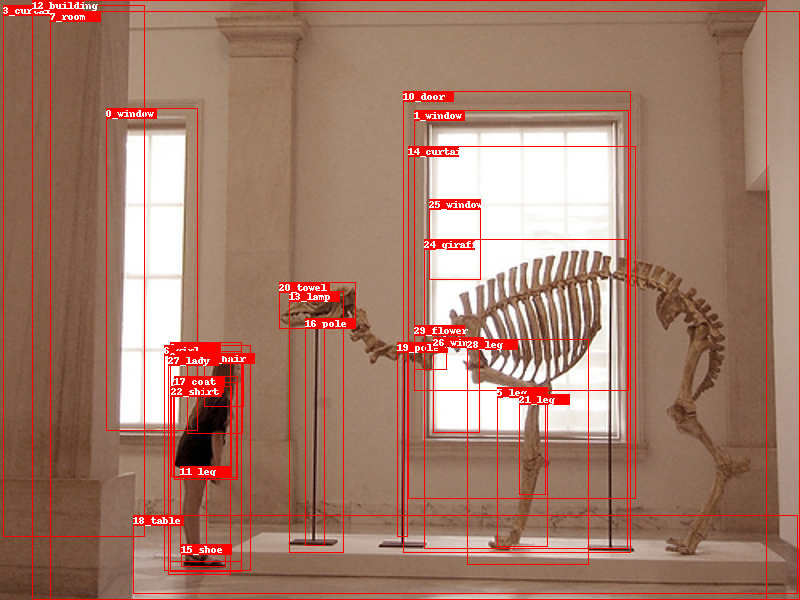

**************************************************
box_labels 0: window; score: 0.6184597611427307
box_labels 1: window; score: 0.5165987014770508
box_labels 2: woman; score: 0.43346720933914185
box_labels 3: curtain; score: 0.3373335599899292
box_labels 4: hair; score: 0.3334759473800659
box_labels 5: leg; score: 0.26123106479644775
box_labels 6: girl; score: 0.25139448046684265
box_labels 7: room; score: 0.20094336569309235
box_labels 8: jacket; score: 0.13587622344493866
box_labels 9: person; score: 0.1184011772274971
box_labels 10: door; score: 0.09899480640888214
box_labels 11: leg; score: 0.09380228817462921
box_labels 12: building; score: 0.07605744153261185
box_labels 13: lamp; score: 0.06640731543302536
box_labels 14: curtain; score: 0.0623101070523262
box_labels 15: shoe; score: 0.05611448362469673
box_labels 16: pole; score: 0.05315880849957466
box_labels 17: coat; score: 0.046267371624708176
box_labels 18: table; score: 0.04233575612306595
box_labels 19: pole; score: 0.0396

In [10]:
image_path = custom_data_info['idx_to_files'][image_idx]
boxes = custom_prediction[str(image_idx)]['bbox'][:box_topk]
box_labels = custom_prediction[str(image_idx)]['bbox_labels'][:box_topk]
box_scores = custom_prediction[str(image_idx)]['bbox_scores'][:box_topk]
all_rel_labels = custom_prediction[str(image_idx)]['rel_labels']
all_rel_scores = custom_prediction[str(image_idx)]['rel_scores']
all_rel_pairs = custom_prediction[str(image_idx)]['rel_pairs']

for i in range(len(box_labels)):
    box_labels[i] = ind_to_classes[box_labels[i]]

rel_labels = []
rel_scores = []
for i in range(len(all_rel_pairs)):
    if all_rel_pairs[i][0] < box_topk and all_rel_pairs[i][1] < box_topk:
        rel_scores.append(all_rel_scores[i])
        label = str(all_rel_pairs[i][0]) + '_' + box_labels[all_rel_pairs[i][0]] + ' => ' + ind_to_predicates[all_rel_labels[i]] + ' => ' + str(all_rel_pairs[i][1]) + '_' + box_labels[all_rel_pairs[i][1]]
        rel_labels.append(label)

rel_labels = rel_labels[:rel_topk]
rel_scores = rel_scores[:rel_topk]

draw_image(image_path, boxes, box_labels, rel_labels, box_scores=box_scores, rel_scores=rel_scores)